# **Project Name**    - Retail Sales Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Md Ismail Quraishi

# **Project Summary -**

Rossmann operates over 3000 drug stores in 7 Europeon countries. Currently rossmann store manager are tasked with predicting their daily sales for upto six weeks in advance. Store sales are influenced by many factors including promotions, competiton, school and state holiday, seasonality and locality. With thousands of managers predicting sales based on their unique circumstances, the accuracy of result can be quite varied. I am provided with historical sales data for 1115 Rossmann stores. My task is to forcast sales columns for the test set. I am provided  with two datasets Rossmann_df and store_df first of all I will read the dataset and try to understand the datasets, then I will check some basic informations like missing values, what all the columns are, descriptions of the dataset. then I will perform data wrangling after that I will visualize some important charts and try to understand them. Then I will handle missing values and outliers. After that I will merge the dataset do feature engineering and also data encoding. Next splitting  the dataset for train and test purpose, after that I will do dimention reduction, data transformation and normalization/standardization. Then I will apply for machine learning algorithm, predicting the data and also evaluate the model. At last I will have to make some conclusion about the project.

# **GitHub Link -**

https://github.com/mdismailquraishicse/capstone_project_3_regression

# **Problem Statement**


Sales prediction is extremely important for any business as it forcast the sales for the clients who want to stock some product for  future. I have two dataset for this project 'Rossmann Stores Data.csv' and 'store.csv'. 'Rossmann Stores Data.csv' has 1017209 rows and 9 columns and 'store.csv' has 1115 rows and 10 columns. I have to do data analysis first for both the datasets and then merge the data after merging the data my task is to apply machine learning regression algorithm to predict the salling price.

**Make a model which is able to predict future sales**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import  StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from numpy import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind,ttest_1samp,t,norm
import eda
import warnings
warnings.filterwarnings('ignore')

C:\Users\Admin\AppData\Local\Temp\ipykernel_1712\4014220726.py:10: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


### Dataset Loading

In [2]:
# Load Dataset
path = 'data/Rossmann Stores Data.csv'
df = pd.read_csv(path)

### Dataset First View

In [3]:
# First view for rossmann_df
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Dataset Rows & Columns count, Duplicate values, Missing, Unique value count

In [4]:
# Display Shape, Columns, Duplicates, Missing, Unique
eda.showSCDMU(df)

 Rows and columns count for rossmann_df : (1017209, 9)

columns :  ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

duplicates counts : 0

Nan\missing count :
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Unique Count :
Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


### What did you know about your dataset?

1. The dataset has 1017209 rows and 9 columns.
2. There is no duplicate row.
3. There is no missing values in any column.
4. There are 7 columns of where data types are int64 and 2 columns object data type.

## ***2. Understanding Your Variables***

In [6]:
# Dataset Describe
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.18
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.38
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,1.00


### Variables Description 

1. Store : id of the store has mean
2. DayOfWeek : Day in numbers like 1 for monday, 2 for tuesday etc. Mean and median for this column is same.
3. Sales : Number of sales for particular data. Mean is 5773 and median is 5744.
4. Customers : Number of customers for perticular date. Mean is 633 and median is 609.
5. Open : Whether the shop was open or not  for the perticular date. It is a binary column.
6. Promo  : A binary column.
7. Holiday : A binary column indicates holiday for a perticular date.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [7]:
# Assigning copy of final_df to a variable
display(df[df['Open']==0].head()) # when shops are closed then customers and sales are 0. Therefore I decided to drop them.
df = df[df['Open'] == 1] # drop the rows where Open = 0.
df.drop('Open', axis=1, inplace = True) # drop Open bacause now there is only 1 value.
print('shape after dropping values for Open = 0 : ',df.shape)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1


shape after dropping values for Open = 0 :  (844392, 8)


In [8]:
# Function to get top ten sum
df['Date'] = df["Date"].apply(lambda x:datetime.strptime(x, '%Y-%m-%d').date()) # Convert Date column from string to datetime format
df['year'] = df['Date'].apply(lambda x: x.year) # Fetching year from Date
top10storesWithHighestSales = df.groupby(['Store'])['Sales'].sum().sort_values(ascending=False).head(10)
top10storesWithHighestCustomers = df.groupby(['Store'])['Customers'].sum().sort_values(ascending=False).head(10)
meanSalesForStateHoliday = df.groupby(['StateHoliday'])['Sales'].sum().sort_values(ascending=False)
meanSalesForSchoolHoliday = df.groupby(['SchoolHoliday'])['Sales'].sum().sort_values(ascending=False)
meanSalesForDayOfWeek = df.groupby(['DayOfWeek'])['Sales'].sum().sort_values(ascending=False)
meanSalesForPromo = df.groupby(['Promo'])['Sales'].sum().sort_values(ascending=False)

In [9]:
top10storesWithHighestSales.reset_index(name='sum_sales')

,Store,sum_sales
0,262,19516842
1,817,17057867
2,562,16927322
3,1114,16202585
4,251,14896870
5,513,14252406
6,788,14082141
7,733,14067158
8,383,13489879
9,756,12911782


In [10]:
top10storesWithHighestCustomers.reset_index(name='sum_customers')

,Store,sum_customers
0,733,3206058
1,262,3204694
2,562,2924960
3,769,2902351
4,1114,2509542
5,817,2454370
6,1097,2280508
7,335,2246936
8,259,2210980
9,251,1908934


In [11]:
meanSalesForStateHoliday.reset_index(name='MeanSale')

,StateHoliday,MeanSale
0,0,5113659442
1,0,751505326
2,a,5890305
3,b,1433744
4,c,691806


In [12]:
meanSalesForSchoolHoliday.reset_index(name='MeanSale')

,SchoolHoliday,MeanSale
0,0,4696260531
1,1,1176920092


In [13]:
meanSalesForPromo.reset_index(name='MeanSale')

,Promo,MeanSale
0,1,3101206286
1,0,2771974337


In [14]:
meanSalesForDayOfWeek.reset_index(name='MeanSale')

,DayOfWeek,MeanSale
0,1,1130203012
1,2,1020411930
2,5,980555941
3,3,954962863
4,4,911177709
5,6,846317735
6,7,29551433


In [15]:
eda.getMeanMedian(df, 'year', 2013)

,mean,50%
Store,558.01,558.00
DayOfWeek,3.52,3.00
Sales,6814.39,6218.00
Customers,757.54,670.00
Promo,0.43,0.00
SchoolHoliday,0.20,0.00
year,2013.00,2013.00


In [16]:
eda.getMeanMedian(df, 'year', 2014)

,mean,50%
Store,559.11,558.00
DayOfWeek,3.51,3.00
Sales,7025.40,6427.00
Customers,774.73,686.00
Promo,0.45,0.00
SchoolHoliday,0.20,0.00
year,2014.00,2014.00


In [17]:
eda.getMeanMedian(df, 'year', 2015)

,mean,50%
Store,558.04,558.00
DayOfWeek,3.53,4.00
Sales,7088.13,6530.00
Customers,752.67,670.00
Promo,0.47,0.00
SchoolHoliday,0.16,0.00
year,2015.00,2015.00


### What all manipulations have you done and insights you found?

1. First of all I displayed the data when Store are not open and found that when stores are not open then number of customers and sales are 0.
2. Then I decided to drop the rows where Open = 0. After that I dropped Open column.
3. Top store with highest sum of sale is 262 with 19516842 number of sales.
4. Top store with highest sum of customer is 733 with 3206058 number of customers.
5. Mean sale is 4 times higher when there is no school holiday.
6. Mean sales for day 7 is least. It is because of sunday and holiday.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Target column distribution plot

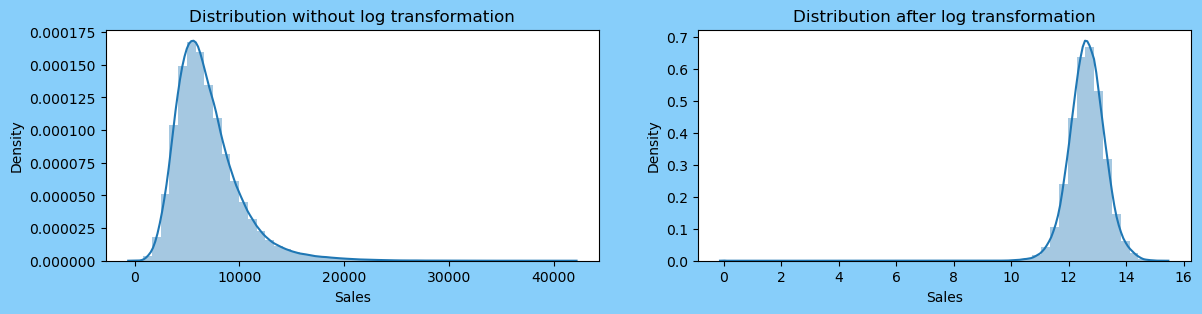

In [18]:
# Chart - 1 visualization code
facecolor = 'lightskyblue'
fig, axes = plt.subplots(ncols=2, nrows=1, facecolor=facecolor, figsize=(14,3))
sns.distplot(df['Sales'], ax=axes[0]) # Without log-transformation
axes[0].set_title('Distribution without log transformation')
sns.distplot(np.log2(df['Sales']+1), ax=axes[1]) # After log-transformation
axes[1].set_title('Distribution after log transformation')
plt.show()

1. Distribution charts shows how data is distributed on the axis. I picked this chart to check the distribution about the target variable.
2. From the above chart I found that Sales column was very close to normal distribution and After log transformation I found that the distribution became more close to Normal distribution.
3. Since the column is normally distributed and it is ideal for ML model building.

#### Chart - 2 - Pie chart groupby day of week and sales.

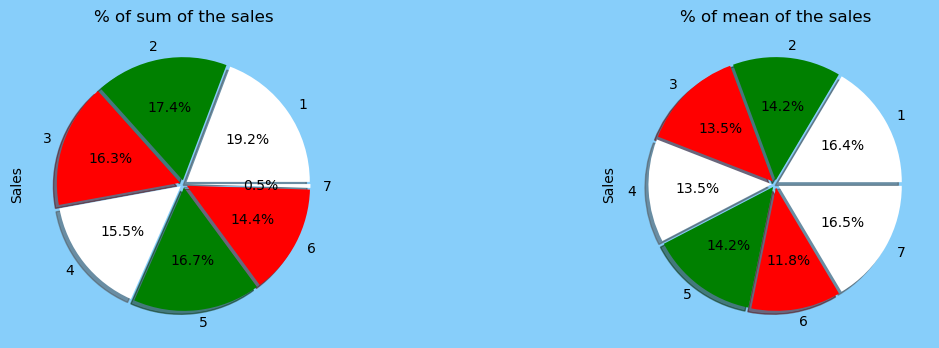

In [19]:
# Chart - 2 visualization code
fig, axes = plt.subplots(nrows=1, ncols=2, facecolor=facecolor, figsize=(14, 4))
df.groupby(['DayOfWeek'])['Sales'].sum().plot.pie(ax=axes[0],shadow =True,explode=[0.03,0.03,0.03,0.03,0.03,0.03,0.03], autopct='%0.1f%%',colors={'red','white','green'})
df.groupby(['DayOfWeek'])['Sales'].mean().plot.pie(ax=axes[1],shadow =True,explode=[0.03,0.03,0.03,0.03,0.03,0.03,0.03], autopct='%0.1f%%',colors={'red','white','green'})
axes[0].set_title('% of sum of the sales')
axes[1].set_title('% of mean of the sales')
plt.show()

1. Pie chart shows part to whole relationship in the data. I picked this chart to see percentage of Sales for different days.
2. I found that sum of sales are maximum at day 1 and minimum at day 7. I think it is because at day 7 most of the time shop not open because of sunday so the sale is minimum and since the day 1 is monday therefore poeple buys more and more because many people could not buy anything at sunday.
3. Yes on day 7 sale is minimun but when we see mean sale then it is close to normal day therefore I can say that lot of the customers also want to buy things on day 7.
4. In the second figure mean % is almost equal for all the days.

#### Chart - 3 - Pie chart Groupby Promo and Sales

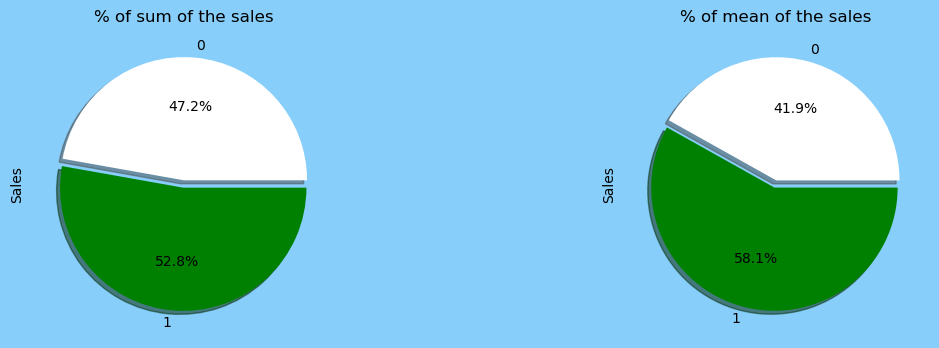

In [20]:
# Chart - 3 visualization code
fig, axes = plt.subplots(nrows=1, ncols=2, facecolor=facecolor, figsize=(14, 4))
df.groupby(['Promo'])['Sales'].sum().plot.pie(ax=axes[0],shadow =True,explode=[0.03,0.03], autopct='%0.1f%%',colors={'red','white','green'})
df.groupby(['Promo'])['Sales'].mean().plot.pie(ax=axes[1],shadow =True,explode=[0.03,0.03], autopct='%0.1f%%',colors={'red','white','green'})
axes[0].set_title('% of sum of the sales')
axes[1].set_title('% of mean of the sales')
plt.show()

1. In case of promo sale sum is 52.8% and in another case sale is just 47.2%.
2. In case of promo sale mean is 58.1% while in another case sale is just 41.9%.
3. I found that in case when there is non promo the sale is lower therefore promo play important role with sales.

#### Chart - 4 - Pie chart groupby school holiday and sales.

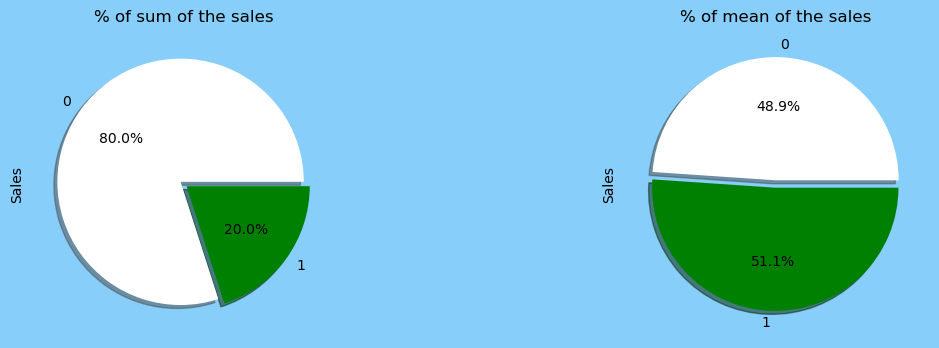

In [21]:
# Chart - 4 visualization code
fig, axes = plt.subplots(nrows=1, ncols=2, facecolor=facecolor, figsize=(14, 4))
df.groupby(['SchoolHoliday'])['Sales'].sum().plot.pie(ax=axes[0],shadow =True,explode=[0.03,0.03], autopct='%0.1f%%',colors={'red','white','green'})
df.groupby(['SchoolHoliday'])['Sales'].mean().plot.pie(ax=axes[1],shadow =True,explode=[0.03,0.03], autopct='%0.1f%%',colors={'red','white','green'})
axes[0].set_title('% of sum of the sales')
axes[1].set_title('% of mean of the sales')
plt.show()

1. Average sale for holiday is 51.1% and for non holiday is 48.9%.
2. Sum of the % for holiday is 80% and for non holiday is 20%.
3. School holiday leading to more sales it might be because there are lot of teenage students who are important customers.

#### Chart - 5 - Pie chart groupby State Holiday and sales.

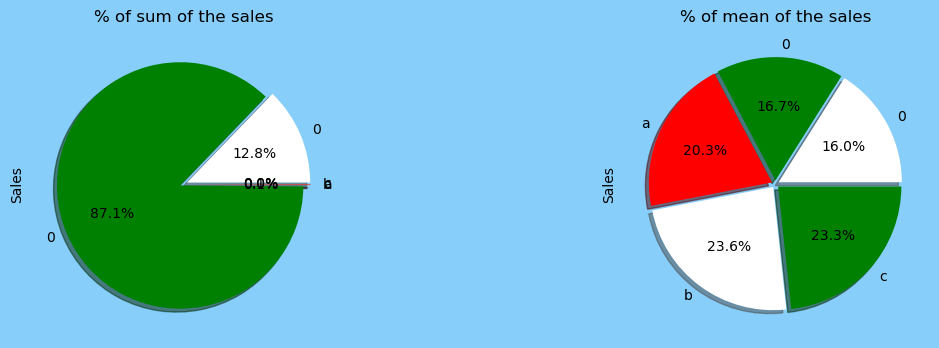

In [22]:
# Chart - 5 visualization code
fig, axes = plt.subplots(nrows=1, ncols=2, facecolor=facecolor, figsize=(14, 4))
df.groupby(['StateHoliday'])['Sales'].sum().plot.pie(ax=axes[0],shadow =True,explode=[.03,.03,.03,.03,.03], autopct='%0.1f%%',colors={'red','white','green'})
df.groupby(['StateHoliday'])['Sales'].mean().plot.pie(ax=axes[1],shadow =True,explode=[.03,.03,.03,.03,.03], autopct='%0.1f%%',colors={'red','white','green'})
axes[0].set_title('% of sum of the sales')
axes[1].set_title('% of mean of the sales')
plt.show()

1. For state holiday 0 sale is 46.3%, for '0' 48.3%, for a 2.3%, for b 17% and for c 14%.
2. More that 87% of sum sales are when there is no holidays in state and state type '0'. Only few percentage of sales happened during holiday a,b,c. I think a,b,c are state festival and that day customers busy celebrating the festivals therefore those days are not good for business.

Chart 6 - Yearwise Sales

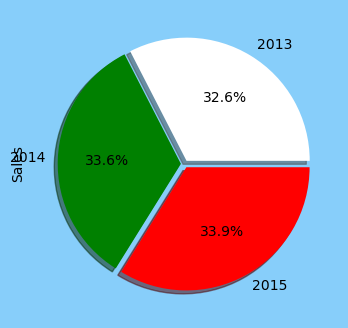

In [23]:
# Chart - 11 visualization code
plt.figure(facecolor=facecolor, figsize=(4,4))
df.groupby(['year'])['Sales'].mean().plot.pie(shadow =True,explode=[0.03,0.03,.03], autopct='%0.1f%%',colors={'red','white','green'})
plt.show()

1. Average sale for 2013,2014 and 2015 is almost equal which is nearly 33%.
2. Sales for each year is almost same.

#### Chart - 12

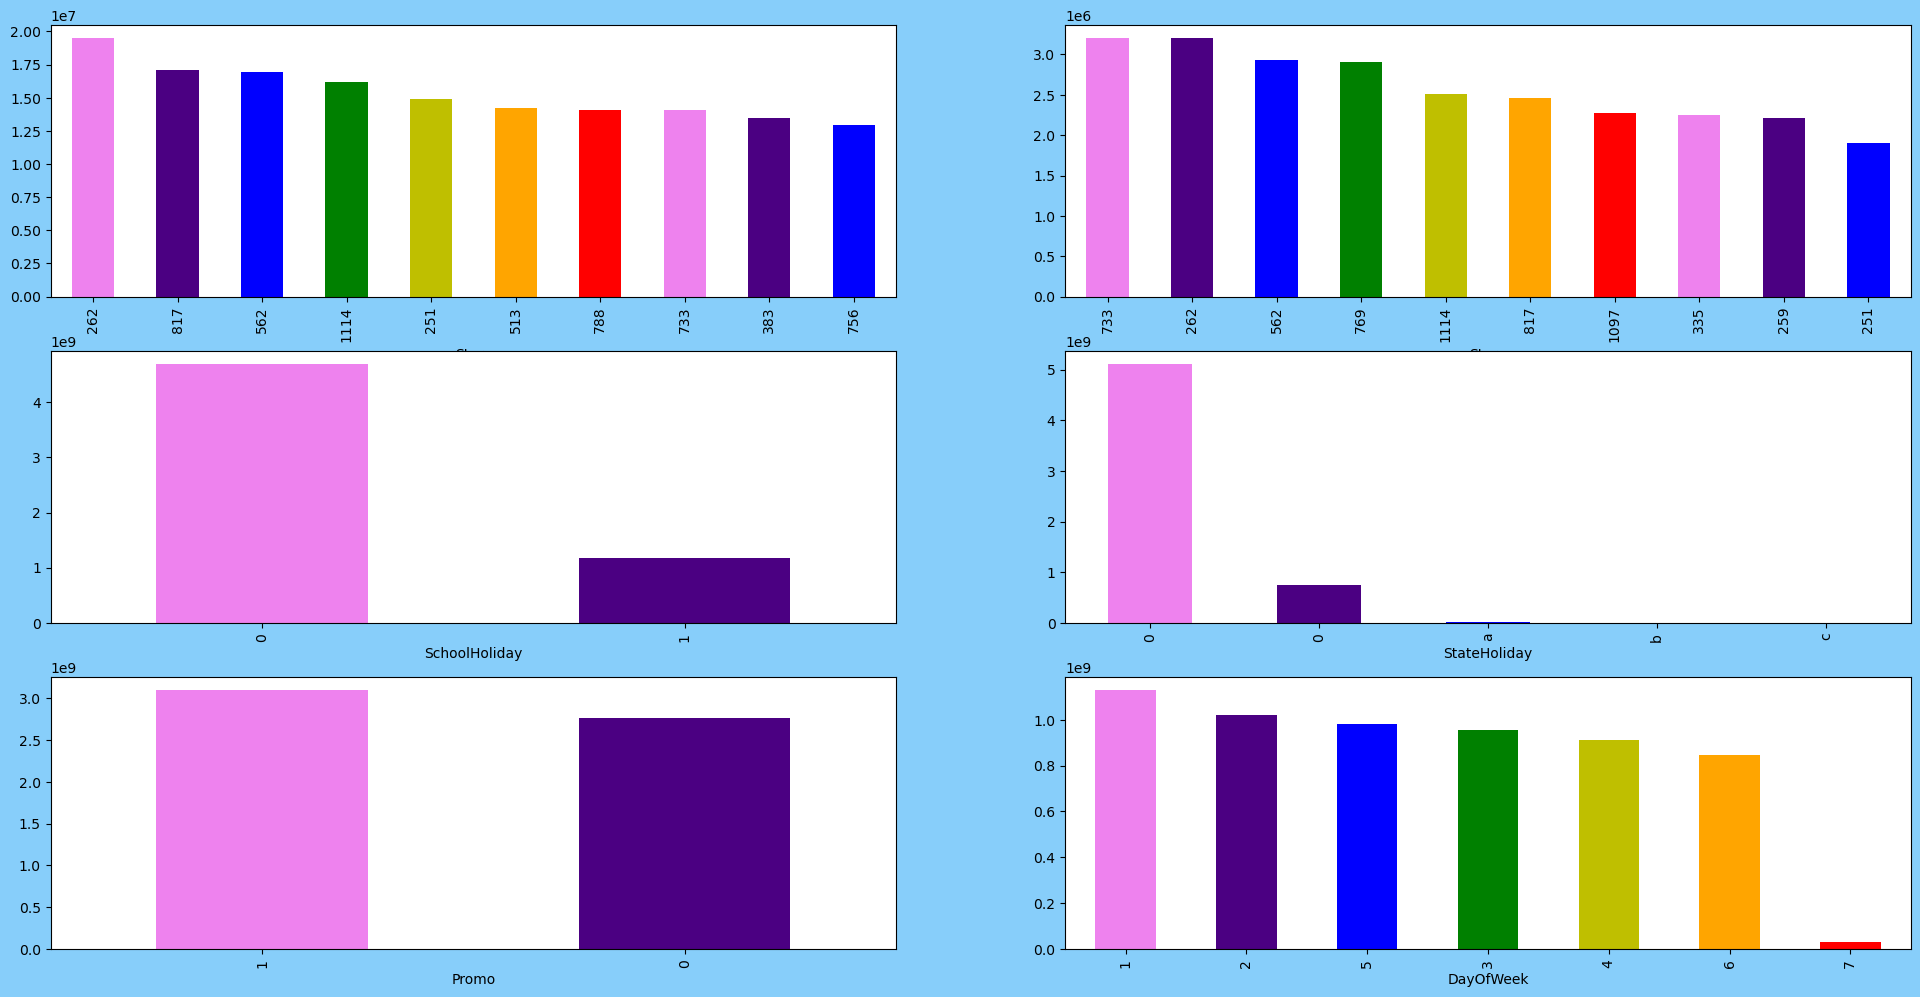

In [24]:
# Chart - 12 visualization code
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24,12), facecolor=facecolor)
colors = ['violet','indigo','b','g','y','orange','r']
top10storesWithHighestSales.plot.bar(ax=axes[0][0], color=colors)
top10storesWithHighestCustomers.plot.bar(ax=axes[0][1], color=colors)
meanSalesForSchoolHoliday.plot.bar(ax=axes[1][0], color=colors)
meanSalesForStateHoliday.plot.bar(ax=axes[1][1], color=colors)
meanSalesForPromo.plot.bar(ax=axes[2][0], color=colors)
meanSalesForDayOfWeek.plot.bar(ax=axes[2][1], color=colors)
plt.show()

#### Chart - 14 - Correlation Heatmap

In [25]:
# Correlation Heatmap visualization code
plt.rcParams['figure.figsize'] = (24,8)
corr = df.corr()
sns.heatmap(corr,annot=True, cmap= 'coolwarm')
plt.show()

ValueError: could not convert string to float: 'a'

##### 1. Why did you pick the specific chart?

Corellation chart shows relationship between variables therefore I picked this chart to check correlations.

##### 2. What is/are the insight(s) found from the chart?

I found that our target variable Sales has -0.46 corralation with day of week, 0.89 with customers, 0.68 with open, 0.45 with Promo. Variable day of week has -0.39 correlation with customers, -0.53 with open,-0.39 with promo, -0.21with school holiday. Variable customers has correlation with 0.62 with open, 0.32 with promo and -0.15 with promo2. Variable Open has correlation 0.3 with Promo.
Variable Competition Distance has correlation -0.14 with promo2 and -0.11 with Promo2SinceYear. rest of the variables have very less correlations with each other.

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
drop_col = ['Store','Date','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek',
            'Promo2SinceYear','PromoInterval','DayOfWeek','Promo','SchoolHoliday','StateHoliday',
            'Promo2']
            
sns.pairplot(final_df.drop(columns = drop_col))
plt.show()

##### 1. Why did you pick the specific chart?

Pair chart gives very good visualization of realtionship between two variables which is very important to select and understand the variables I picked this chart to see the relationship between the variables.

##### 2. What is/are the insight(s) found from the chart?

I found that only Sales and Customers has linear relationship.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer here.

*   Mean sale for promo = 1 is greater than or equal to the mean sale when promo = 0.
*   Mean sale  is 0 when shop is closed.
*   Mean sale for store type b is equal to mean sales of a+b+c.

### Hypothetical Statement - 1
* Mean Sale for promo = 1 is equal to mean sale for promo = 0.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   Mean sale for promo = 1 is greater than or equal to the mean sale when promo = 0.
* H0: promo_mean >= non_promo_mean
* H1: promo_mean < non_promo_mean

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

s1 = final_df[final_df['Promo']== 1]['Sales']
s2 = final_df[final_df['Promo']== 0]['Sales']

dof = len(s1)+len(s2)-2
alpha = 1-0.05
lower = t.ppf(alpha,dof)
statistic, p_value = ttest_ind(s1,s2,equal_var=False, alternative='less')

print('dof',dof)
print('alpha ',alpha)
print(f"lower bound : {lower}")
print(f"Statistic : {statistic}  p_value : {p_value}")
if  statistic < lower:
  print('Null hypothesis is rejected')
else :
  print('Failed to reject null hypothesis')

##### Which statistical test have you done to obtain P-Value?

I have done T-test to get P_value.

##### Why did you choose the specific statistical test?

Because my sample size and variance are not same.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Mean Sale is 0 when shop is closed.
* H0: mean Sale = 0
* H1: mean Sale > 0
* Significance level = 0.05

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
s1 = final_df[final_df['Open'] == 0]['Sales']
samp_mean = s1.mean()
pop_mean = final_df['Sales'].mean()
s = s1.std()
n = len(s1)
alpha = 1-0.05
critical_value = t.ppf(alpha,n-1)
t_statistic = (samp_mean- pop_mean)/(s/np.sqrt(n))

print('Sample mean :', samp_mean)
print('population mean :', pop_mean)
print('s',s)
print('n',n)
print('alpha ',alpha)
print('critical value ',critical_value)
print('t_statistic ',t_statistic)

if t_statistic > critical_value:
  print('Null hypothesis is rejected')
else :
  print('Null hypothesis is accepted')

##### Which statistical test have you done to obtain P-Value?

I have done t statistic test to obrain p_value.

##### Why did you choose the specific statistical test?

Because the variance for sample and population were different.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Mean sale for store type b is equal to mean sales of a+c+d.
* H0: E[b] = E[a+c+d]
* H1: E[b] != E[a+c+d]

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
sa = final_df[final_df['StoreType'] == 'a']['Sales']
sb = final_df[final_df['StoreType'] == 'b']['Sales']
sc = final_df[final_df['StoreType'] == 'c']['Sales']
sd = final_df[final_df['StoreType'] == 'd']['Sales']
# mean1 = sb.mean()
mean2 = sa.mean()+sc.mean()+sd.mean()
dof = len(sa)-1
lower = t.ppf(0.025,dof)
upper = t.ppf(0.975,dof)
stat,p_value = ttest_1samp(sa,mean2)

print(f"lower : {lower} and upper :{upper}")
print(f'Statistic :{stat} and p_value: {p_value}')
if stat < lower or stat > upper:
  print('Null hypothesis is rejected')
else:
  print('null hypothesis is accepted')

##### Which statistical test have you done to obtain P-Value?

I have done t statistic test.

##### Why did you choose the specific statistical test?

Because standard daviation of the samples were different.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df = final_df.copy()
df = df[df['Open'] == 1]
for i in null_calculator(df).keys():
    print(f"{i} : {null_calculator(df)[i]/len(df)*100}")
    
# Filling nan values with mean in column CompetitionDistance
# df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].mean())

# Filling nan values with median in column CompetitionOpenSinceMonth and CompetitionOpenSinceYear
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].median())
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].median())


# dropping the columns which has more than 45% null values because already lost lot of informations and also dropping the rows
# which has only less than 1% null values. 
col_to_drop = ['Open','Promo2SinceWeek','Promo2SinceYear','PromoInterval']
df.drop(columns=col_to_drop,inplace=True)
df = df.dropna()

#### What all missing value imputation techniques have you used and why did you use those techniques?

First of all I deleted all data when Stores were closed then I fill nan values in columns CompetitionDistance and CompetitionOpenSinceYear with median and I dropped those columns which contains more than 40% nan values. I also dropped some observations which containing less than 1% nan values. Since the Open column was containing contant value 1 therefore I decided to drop this column too.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# Single variate outlier detection
# Dropping those observations when sale is zero
df = df[df['Sales']!=0]
# Plotting outliers
plt.rcParams['figure.figsize'] = (15,3)
sns.boxplot(df['Sales'])
plt.title('Before outlier removal')
print(f"Shape before outlier removal {df.shape}")
plt.show()
print('')
for i in range(1,7):
  q1 = df['Sales'].quantile(.25)
  q3 = df['Sales'].quantile(.75)
  iqr = q3-q1
  lower = q1-(1.5*iqr)
  upper = q3+(1.5*iqr)
  df = df[(df['Sales'] <= upper) & (df['Sales'] >= lower)]
  sns.boxplot(df['Sales'])
  plt.title('After The Iteration '+ str(i) +' The Shape is '+ str(df.shape))
  plt.show()
  print('')

##### What all outlier treatment techniques have you used and why did you use those techniques?

I deleted those observation when sale is 0 because when customer is 0 then sale is also 0 therefore these are some kind of outliers. Then I focused on the target column and deleted some outliers using  1.5*IQR method.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# one hot encoding for Assortment
df['AssortmentA'] = df['Assortment'].apply(lambda data: 1 if data == 'a' else 0)
df['AssortmentB'] = df['Assortment'].apply(lambda data: 1 if data == 'b' else 0)
df['AssortmentC'] = df['Assortment'].apply(lambda data: 1 if data == 'c' else 0)

#Store type one hot encoding
df['StoreTypeA'] = df['StoreType'].apply(lambda data: 1 if data == 'a' else 0)
df['StoreTypeB'] = df['StoreType'].apply(lambda data: 1 if data == 'b' else 0)
df['StoreTypeC'] = df['StoreType'].apply(lambda data: 1 if data == 'c' else 0)
df['StoreTypeD'] = df['StoreType'].apply(lambda data: 1 if data == 'd' else 0)

# Econding StateHoliday
df['sh_a'] = df['StateHoliday'].apply(lambda data: 1 if data == 'a' else 0)
df['sh_b'] = df['StateHoliday'].apply(lambda data: 1 if data == 'b' else 0)
df['sh_c'] = df['StateHoliday'].apply(lambda data: 1 if data == 'c' else 0)
df['sh_d'] = df['StateHoliday'].apply(lambda data: 1 if data == 0 else 0)
df['sh_e'] = df['StateHoliday'].apply(lambda data: 1 if data == '0' else 0)

# Dropping the columns
df.drop(columns =['Assortment', 'StoreType','StateHoliday'], inplace= True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Here I did one hot encoding to StateHoliday, StoreType and Assortment columns because the mean price of each catagory was different.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# from str to date time conversion
df['Date'] = df['Date'].apply(lambda col: datetime.strptime(col,'%Y-%m-%d'))

# creating day, month, year columns
plt.rcParams['figure.figsize'] = (5,3)
df['day'] = df['Date'].apply(lambda d: d.day)
df['month'] = df['Date'].apply(lambda m: m.month)
df['year'] = df['Date'].apply(lambda y: y.year)

# Dropping Date column
df.drop(columns=['Date'], inplace=True)

In [ ]:
#Multicollinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# Multicolinearitiy check
high_vif_col = ['Store','Sales','year','AssortmentA','sh_d','StoreTypeA','sh_e','CompetitionOpenSinceYear']
calc_vif(df[[i for i in df.describe().columns if i not in high_vif_col ]])

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
selected_features = ['DayOfWeek','Customers','Promo','SchoolHoliday','CompetitionDistance','CompetitionOpenSinceMonth','Promo2',\
                     'AssortmentB','AssortmentC','StoreTypeB','StoreTypeC','StoreTypeD','sh_a','sh_b','sh_c','day','month','Sales']
selected_df = df[selected_features]

##### What all feature selection methods have you used  and why?

I simply used vif method to find good featues.

##### Which all features you found important and why?

I choosed these feature because these has less than 7 vif scores.
* DayOfWeek
* Customers
* Promo
* SchoolHoliday
* CompetitionDistance
* CompetitionOpenSinceMonth
* Promo2
* AssortmentB
* AssortmentC
* StoreTypeB
* StoreTypeC
* StoreTypeD
* sh_a
* sh_b
* sh_c
* day
* month
* Sales

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
X = np.log10(selected_df[['Customers','CompetitionDistance']])
selected_df['Customers'] = X['Customers']
selected_df['CompetitionDistance'] = X['CompetitionDistance']
del X

My data was in different range . To make them in same range data transformation is needed. Here I am using log transformation to make data more close to normal distribution.

### 6. Data Scaling

In [ ]:
# Scaling your data
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(selected_df[['Customers','CompetitionDistance']])
selected_df['Customers'] = X[:,0]
selected_df['CompetitionDistance'] = X[:,1]
del X

##### Which method have you used to scale you data and why?

Here I used standard scaler because my data was already close to normal distribution.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

I do not think in my case dimentionality reduction is needed because I already have limited features.

In [ ]:
# DImensionality Reduction (If needed)

from sklearn.decomposition import PCA
pca = PCA(random_state=0)
X = pca.fit_transform(selected_df.drop(columns=['Sales']))
pca.explained_variance_ratio_

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used PCA for reducing my dimentions.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
xtrain,xtest,ytrain,ytest = train_test_split(X, selected_df['Sales'], test_size=.2)

##### What data splitting ratio have you used and why? 

I choose 20% for test and rest 80% to train my model because more data is needed to train a model well.

## ***7. ML Model Implementation***

### ML Model - 1 - Linear Regression

In [ ]:
# ML Model - 1 Implementation
linearModel = LinearRegression()
# Fit the Algorithm
linearModel.fit(xtrain,ytrain)
print(f" coefficients for the model are :\n{linearModel.coef_}")
print(f" Model intercept is : {linearModel.intercept_}")

# Predict on the model
pred_train = linearModel.predict(xtrain)
pred_test = linearModel.predict(xtest)

In [ ]:
linearModel.get_params()

In [ ]:
def show_metrix(xtrain,ytrain,xtest,ytest):
  pd.Series([r2_score(ytrain,pred_train),r2_score(ytest,pred_test)],\
          index=['Train R2_score', 'Test R2_score']).plot.bar(color=['red','green'])
  plt.show()
  #Printing scores
  print(' ')
  print(f"R2_score train : {r2_score(ytrain,pred_train)}")
  print(f"R2_score test : {r2_score(ytest,pred_test)}\n")

  # mean squared for train and test
  pd.Series([np.math.sqrt(mean_squared_error(ytest,pred_test)),np.math.sqrt(mean_squared_error(ytest,pred_test))],\
            index=['Train RMSE', 'Test RMSE']).plot.bar(color=['red','green'])
  plt.show()
  # Printing scores
  print(' ')
  print(f"Root mean squared error train : {np.math.sqrt(mean_squared_error(ytrain,pred_train))}")
  print(f"Root mean squared error test : {np.math.sqrt(mean_squared_error(ytest,pred_test))}")

In [ ]:
# Visualizing evaluation Metric Score chart
plt.rcParams['figure.figsize'] = (20,3)
# Metrices
show_metrix(xtrain,ytrain,xtest,ytest)

Here I am using R2score evaluation matrix to see the performance of my model my r2score is .78 for train and test predictions.
then I used root mean squared error matrix to see the error for actual and predicted data and the error for train is 1115 and for test is 1117 which is nearly equal to each other therefore I can say that the model is not overfit.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
grid_param = {'fit_intercept': [True,False],'positive': [True,False]}
grid_model = GridSearchCV(linearModel,cv=10, param_grid = grid_param)
# cross validation fitting
grid_model.fit(xtrain,ytrain)
bestLinearEstimator = grid_model.best_estimator_

print(f" coefficients for the model are :\n{bestLinearEstimator.coef_}")
print(f" Model intercept is : {bestLinearEstimator.intercept_}")

# Predict on the model
pred_train = bestLinearEstimator.predict(xtrain)
pred_test = bestLinearEstimator.predict(xtest)

In [ ]:
# Visualizing evaluation Metric Score chart
# Metrices
show_metrix(xtrain,ytrain,xtest,ytest)

##### Which hyperparameter optimization technique have you used and why?

I used fit_intercept and positive hyper parameters to tune the model because Linear Regression has limited hyper parameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I did not see any improvement.

### ML Model - 2 - Decision Tree Regressor

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Fitting decission tree regressor
dtrModel = DecisionTreeRegressor()
dtrModel.fit(xtrain,ytrain)

# Predicting
pred_train = dtrModel.predict(xtrain)
pred_test = dtrModel.predict(xtest)

In [ ]:
# Visualizing evaluation Metric Score chart

# Metrices
show_metrix(xtrain,ytrain,xtest,ytest)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
grid_params = {'max_depth' : [13],'random_state':[1], 'min_samples_leaf': [5]}
grid_model = GridSearchCV(estimator=dtrModel,cv= 3, param_grid=grid_params, verbose=2)

# Fit the Algorithm
grid_model.fit(xtrain,ytrain)
bestDtrEstimator = grid_model.best_estimator_
# Predict on the model
pred_train = bestDtrEstimator.predict(xtrain)
pred_test = bestDtrEstimator.predict(xtest)

In [ ]:
# Visualizing evaluation Metric Score chart
# Metrices
show_metrix(xtrain,ytrain,xtest,ytest)

##### Which hyperparameter optimization technique have you used and why?

I used ['max_depth' : [12],'random_state':[1], 'min_samples_leaf': [5]] to avoid overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes earlier the model was overfitted but after cross validation model is good.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

I am using r2score to see the score  of the model and root mean squared error to determine the error. r2 score for the model in train case is .85 and in test case .84. Error for train is 872 and for test is 922 so the difference is not much therefore after applying cross validation and  hyper parameter tuning the model is working good.

### ML Model - 3 - XGBoostRegressor

In [ ]:
# ML Model - 3 Implementation
xgbModel = XGBRegressor(random_state=0)
# Fit the Algorithm
xgbModel.fit(xtrain,ytrain)
# Predict on the model
pred_train = xgbModel.predict(xtrain)
pred_test = xgbModel.predict(xtest)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Metrices
show_metrix(xtrain,ytrain,xtest,ytest)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
grid_params = {'learning_rate':[.8],'random_state' :[0],'n_estimators': [120]}
grid_model = GridSearchCV(estimator=xgbModel,cv= 5, param_grid=grid_params,verbose=2)

# Fit the Algorithm
grid_model.fit(xtrain,ytrain)
bestXGBEstimator = grid_model.best_estimator_

# Predict on the model
pred_train = bestXGBEstimator.predict(xtrain)
pred_test = bestXGBEstimator.predict(xtest)

In [ ]:
# Visualizing evaluation Metric Score chart
# Metrices
show_metrix(xtrain,ytrain,xtest,ytest)

In [ ]:
# Get the best parameters
grid_model.best_params_

##### Which hyperparameter optimization technique have you used and why?

I used 
* 'learning_rate':[.8] - to get better accuracy
* 'random_state' :[0] - to avoid different splits
* 'n_estimators': [120] - to get better accuracy

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes the model is slightly improved and giving better scores.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered 
* R2 score to compare the scores
* mean squared error to compare errors.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I choosed the third model for my final prediction because this model is giving highest r2 score and least error.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
import shap
explainer = shap.Explainer(bestXGBEstimator)
shap_values = explainer(xtest)

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

Force plot shows how features are contributing and the relationship between the features in straight line.

In [ ]:
#Mean SHAP
shap.plots.bar(shap_values)

In bar plot for each feature we calculate mean of the absolute shap values across all observations. Feature that have large mean shap values are those features which have a huge impact on the model prediction.

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

Beeswarm highlights important relationships of the features from the above chart we can see feature 5, 4,6,3,12 have very huge impact on prediction.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. Here are some solutions to predict sales
2. Delete the observations when stores are not opened and also delete the column open because it will contain constant value.
3. Target column follows normal distribution if I remove zeros from the data.
4. Sum of the sale is least on day 7 it is because mostly on day 7 stores are not opened.
5. Average sale is more than 60% in case of promo.
6. Average sale is high when there is school holiday.
7. Average sale in case of state holiday is less than 3% for each a,b and c.
8. Average sales for store type b is highest that is 37% and for type a,c,d is approximately 21%.
9. Average sales for assortment b is highest that is more than 42% and for a and c are 27.3% and 30.2% respectively.
10. Average sales for promo2 is only 47%.
11. We can deploy the model with XGBoost algorithm. Because for training and test dataset, I found 85% r2 scores, 903 and 912 root mean squared error respectively.
12. No overfitting is seen.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***